In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import time
import os
import session_info

In [2]:
# pandas settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# session module version
session_info.show()

## Importing Dataset

In [4]:
# changing directory to main with chdir

os.getcwd()
os.chdir('../../')

In [5]:
path = os.getcwd()
path_train = path+'/stage-2/first-iteration/train/output/train.csv'
path_test = path+'/stage-2/first-iteration/test/output/test.csv'

In [6]:
# reading data train

data_train = pd.read_csv(path_train)

In [7]:
data_train.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,y
0,0.695517,-0.232452,0,-0.713083,1,0,0.695517,-0.401396,-0.260866,-0.900753,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.636765,-0.232452,0,-0.761484,1,1,-0.636765,-0.401396,-1.015248,-0.900753,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.058867,-0.232452,0,1.934648,1,0,1.058867,-0.401396,-0.854313,-0.900753,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.636765,-0.232452,0,-0.763277,0,0,-0.636765,-0.401396,0.211880,-0.900753,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.394532,1.353897,0,-0.350969,1,0,-0.394532,-0.401396,-0.381567,-0.900753,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
# reading data test

data_test = pd.read_csv(path_test)

In [9]:
data_test.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,-1.056270,-1.758874,0,0.121072,0,0,-1.056270,1.611873,-0.711861,-0.576829,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.772583,-0.227607,0,1.118644,1,1,-0.772583,-0.490631,-0.169194,-0.576829,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.583458,1.303660,0,-0.024144,1,0,-0.583458,-0.911131,-0.303898,-0.576829,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,-1.056270,1.303660,0,0.017726,1,1,-1.056270,-0.070130,-0.250017,0.387967,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.686036,-0.227607,0,-0.472753,1,0,1.686036,-0.490631,-0.146102,-0.576829,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Modelling

### Split Data Train & Test

#### Kaggle Default

In [7]:
# splitting by kaggle task default

jumlah_train = data_train.shape[0]
jumlah_test  = data_test.shape[0]

total      = jumlah_train + jumlah_test
perc_train = round(jumlah_train/total*100,2)
perc_test  = round(jumlah_test/total*100,2)

print("Jumlah Train Dataset adalah sejumlah : " +str(jumlah_train)+" ("+str(perc_train)+"%)")
print("Jumlah Test Dataset adalah sejumlah  : " +str(jumlah_test)+"  ("+str(perc_test)+"%)")

Jumlah Train Dataset adalah sejumlah : 45276 (90.92%)
Jumlah Test Dataset adalah sejumlah  : 4521  (9.08%)


In [8]:
# categorising feature & label

feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']

label   = ['y']

In [9]:
# train variable

X_train = data_train[feature]
y_train = data_train['y']

In [10]:
# test variabel

X_test = data_test[feature]
y_test = data_test['y']

### Modeling Preparation

#### Evaluation Method

In [12]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [13]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [32]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c, solver='liblinear')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [95]:
def draw_learning_curve_knn(param_values):
    train_scores = []
    test_scores = []

    for n in param_values:
        model = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n-neighbor')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter n-neighbor - KNN')
    plt.legend()
    plt.show()

### Logistic Regresion

#### Without Hyperparameter Tuning

In [11]:
start_time = time.time()

logreg = LogisticRegression(solver='lbfgs', 
                            max_iter=210,
                            C=1)
logreg.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 1.2809243202209473 ms


In [12]:
ytrain_pred = logreg.predict(X_train)
ytest_pred  = logreg.predict(X_test)

In [20]:
accuracy_train = accuracy_score(y_train, ytrain_pred)
accuracy_test  = accuracy_score(y_test, ytest_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_test)

Accuracy  (Train Set)    : 0.86
Accuracy  (Test Set)     : 0.83


In [21]:
precision_train = precision_score(y_train, ytrain_pred)
precision_test  = precision_score(y_test, ytest_pred)
print("Precision  (Train Set)    : %.2f" % precision_train)
print("Precision  (Test Set)     : %.2f" % precision_test)

Precision  (Train Set)    : 0.86
Precision  (Test Set)     : 0.31


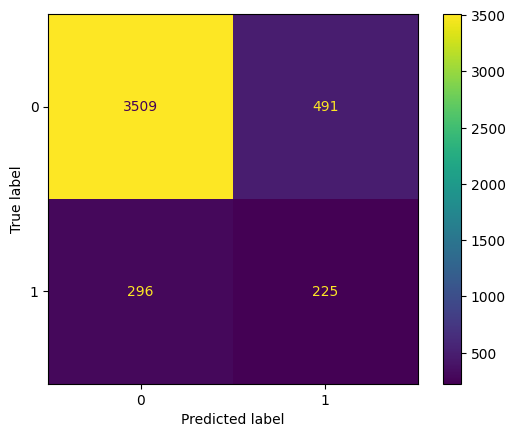

In [22]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

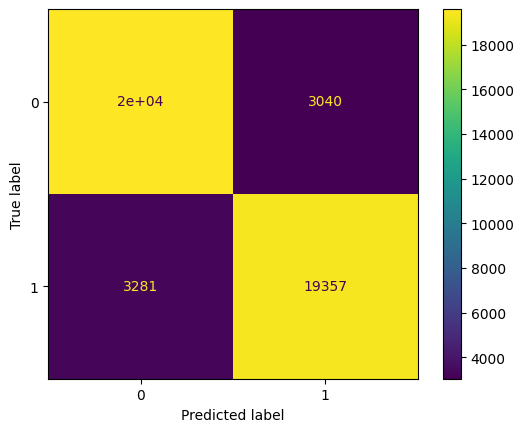

In [23]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

#### With Hyperparameter Tuning

In [24]:
penalty = ['l1', 'l2']
C = [0.0001, 0.05, 1, 10, 50, 100]
max_iter = [210, 1000, 10000]
param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)

In [28]:
start_time = time.time()

logreg = LogisticRegression(solver='liblinear')
logistic_grid = GridSearchCV(logreg, param_grid)
logistic_grid.fit(X_train, y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 436.822793006897 ms


In [29]:
print("\nBest: %f using %s" % (logistic_grid.best_score_, logistic_grid.best_params_))


Best: 0.836823 using {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}


In [30]:
ytrain_loreg_grid_pred = logistic_grid.predict(X_train)
ytest_loreg_grid_pred  = logistic_grid.predict(X_test)

In [31]:
accuracy_logreg_grid_train = accuracy_score(y_train, ytrain_loreg_grid_pred)
accuracy_logreg_grid_test  = accuracy_score(y_test, ytest_loreg_grid_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_logreg_grid_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_logreg_grid_test)

Accuracy  (Train Set)    : 0.86
Accuracy  (Test Set)     : 0.82


In [32]:
precision_logreg_grid_train = precision_score(y_train, ytrain_loreg_grid_pred)
precision_logreg_grid_test  = precision_score(y_test, ytest_loreg_grid_pred)
print("Precision  (Train Set)    : %.2f" % precision_logreg_grid_train)
print("Precision  (Test Set)     : %.2f" % precision_logreg_grid_test)

Precision  (Train Set)    : 0.86
Precision  (Test Set)     : 0.31


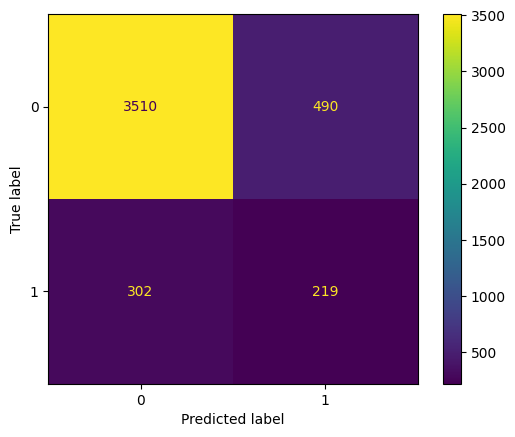

In [33]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_loreg_grid_pred, labels=logistic_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

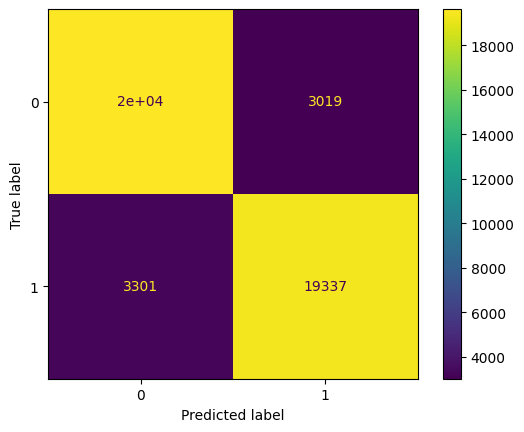

In [34]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_loreg_grid_pred, labels=logistic_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

##### Phase 1 Learning Curve

param value: 1e-12; train: 0.8131290486484751; test: 0.7327173704414587
param value: 10.101010101011092; train: 0.9369848028361527; test: 0.7295738963531669
param value: 20.20202020202118; train: 0.9370041597252121; test: 0.7278416506717851
param value: 30.303030303031274; train: 0.9370094789671048; test: 0.7272384836852208
param value: 40.40404040404137; train: 0.9370119024808359; test: 0.7269073896353166
param value: 50.50505050505146; train: 0.9370134596176776; test: 0.7269333013435699
param value: 60.606060606061554; train: 0.9370141289133376; test: 0.7268382917466409
param value: 70.70707070707164; train: 0.9370144528290215; test: 0.7267802303262956
param value: 80.80808080808173; train: 0.937014768939508; test: 0.7267360844529752
param value: 90.90909090909182; train: 0.9370148430888816; test: 0.7267039347408829
param value: 101.0101010101019; train: 0.9370149269947514; test: 0.7266833013435702
param value: 111.111111111112; train: 0.9370151748097626; test: 0.7266578694817659
par

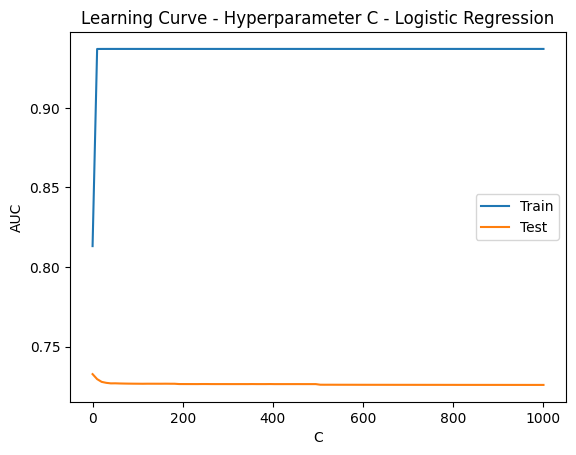

In [37]:
param_values = [float(x) for x in np.linspace(0.000000000001, 1000, 100)]
draw_learning_curve(param_values)

##### Phase 2 Learning Curve

param value: 1e-16; train: 0.8131288262003549; test: 0.7327173704414587
param value: 1.0909090909090909e-16; train: 0.8131289871825471; test: 0.7327216890595009
param value: 1.1818181818181817e-16; train: 0.813128722781492; test: 0.7327154510556623
param value: 1.2727272727272727e-16; train: 0.8131291676777324; test: 0.7327185700575816
param value: 1.3636363636363637e-16; train: 0.813128937424415; test: 0.7327142514395394
param value: 1.4545454545454545e-16; train: 0.5; test: 0.5
param value: 1.5454545454545455e-16; train: 0.8131290418189274; test: 0.7327183301343569
param value: 1.6363636363636365e-16; train: 0.8131290203546352; test: 0.7327190499040307
param value: 1.7272727272727275e-16; train: 0.8131289423026632; test: 0.7327183301343569
param value: 1.8181818181818182e-16; train: 0.5; test: 0.5
param value: 1.9090909090909092e-16; train: 0.8131292642670478; test: 0.7327168905950096
param value: 2e-16; train: 0.8131290749910157; test: 0.7327178502879079
param value: 2.0909090909090

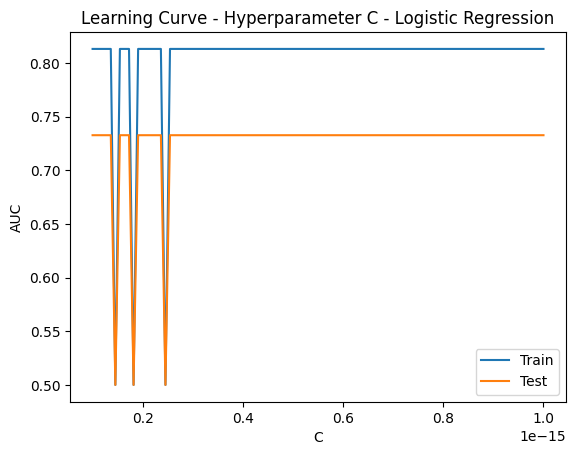

In [50]:
param_values = [float(x) for x in np.linspace(0.0000000000000001, 0.000000000000001, 100)]
draw_learning_curve(param_values)

#### Best Result Implementation From Learning Curve

In [35]:
start_time = time.time()

logreg_best = LogisticRegression(solver='liblinear', 
                            penalty='l2',
                            max_iter=210,
                            C=1e-15)
logreg_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.039542198181152344 ms


In [36]:
ytrain_loreg_best_pred = logreg_best.predict(X_train)
ytest_loreg_best_pred  = logreg_best.predict(X_test)

In [37]:
accuracy_logreg_best_train = accuracy_score(y_train, ytrain_loreg_best_pred)
accuracy_logreg_best_test  = accuracy_score(y_test, ytest_loreg_best_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_logreg_best_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_logreg_best_test)

Accuracy  (Train Set)    : 0.73
Accuracy  (Test Set)     : 0.66


In [38]:
precision_logreg_best_train = precision_score(y_train, ytrain_loreg_best_pred)
precision_logreg_best_test  = precision_score(y_test, ytest_loreg_best_pred)
print("Precision  (Train Set)    : %.2f" % precision_logreg_best_train)
print("Precision  (Test Set)     : %.2f" % precision_logreg_best_test)

Precision  (Train Set)    : 0.69
Precision  (Test Set)     : 0.21


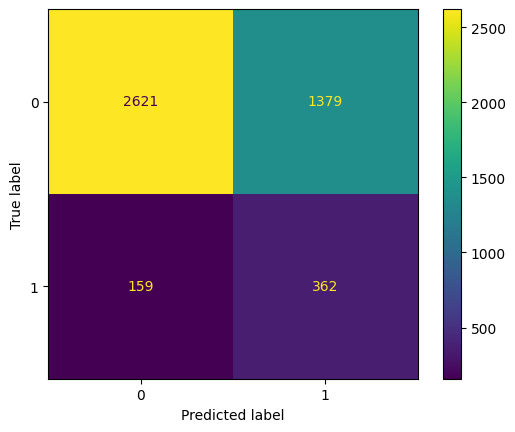

In [39]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_loreg_best_pred, labels=logreg_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_best.classes_)
disp.plot()
plt.show()

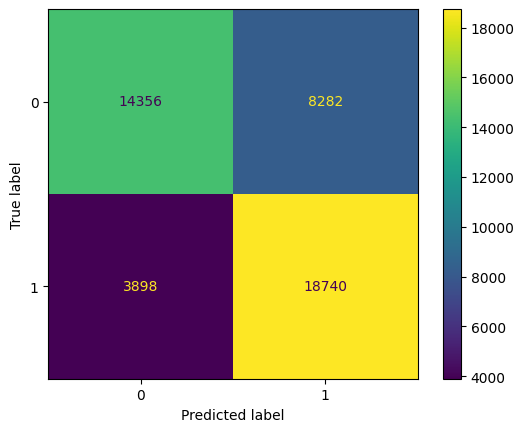

In [40]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_loreg_best_pred, labels=logreg_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_best.classes_)
disp.plot()
plt.show()

#### Feature Importance

In [42]:
kolom = X_train.columns.to_list()
nilai = logistic_grid.best_estimator_.coef_

In [43]:
output = pd.DataFrame({'kolom':kolom,
                      'nilai':nilai[0]})
output.sort_values('nilai', ascending=False).T

,10,8,1,3,0,7,6,9,5,4,2,11,12,14,15,24,16,13,20,25,17,23,26,22,19,18,21
kolom,previous,duration,education,balance,age,month,day,campaign,loan,housing,default,contact_cellular,contact_telephone,marital_married,marital_single,job_student,job_admin.,marital_divorced,job_management,job_technician,job_blue-collar,job_services,job_unemployed,job_self-employed,job_housemaid,job_entrepreneur,job_retired
nilai,1.138608,0.845002,0.448725,0.241803,0.071721,0.023411,-0.345591,-0.471032,-2.052639,-2.057845,-3.940233,-6.102777,-7.310128,-7.474595,-7.475941,-7.812172,-8.158935,-8.250377,-8.587758,-8.612683,-8.833792,-8.955702,-9.708058,-9.854554,-9.892747,-11.589231,-12.305948


### K-NN

#### Without Hyperparameter Tuning

In [44]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.016794919967651367 ms


In [48]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

In [49]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.94
Accuracy  (Test Set)     : 0.81


In [50]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred)
precision_knn_test  = precision_score(y_test, ytest_knn_pred)
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.90
Precision  (Test Set)     : 0.29


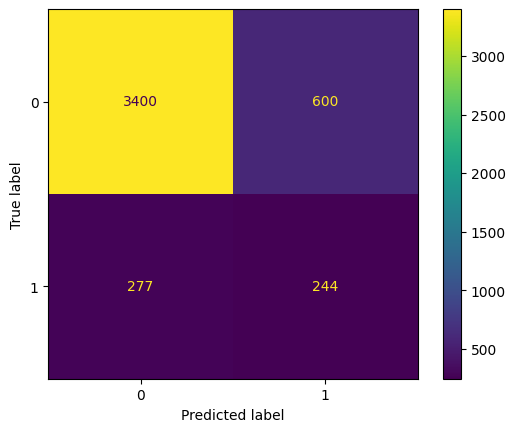

In [51]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

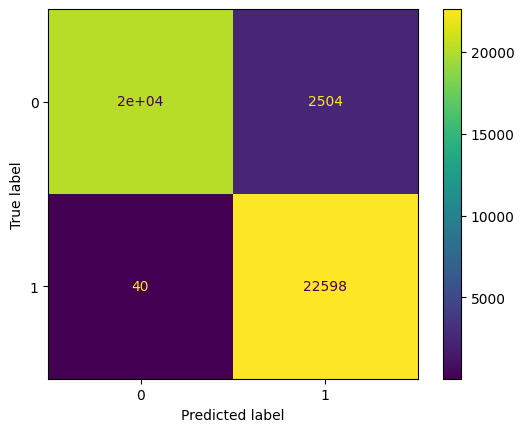

In [52]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

#### With Hyperparameter Tuning

In [53]:
n_neighbors = [10, 50, 100, 250, 450]
metric = ['euclidean', 'manhattan']
param_grid = dict(metric=metric, n_neighbors=n_neighbors)

In [54]:
start_time = time.time()

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid)
knn_grid.fit(X_train, y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 37.7869930267334 ms


In [55]:
print("\nBest: %f using %s" % (knn_grid.best_score_, knn_grid.best_params_))


Best: 0.880222 using {'metric': 'manhattan', 'n_neighbors': 10}


In [56]:
ytrain_knn_grid_pred = knn_grid.predict(X_train)
ytest_knn_grid_pred  = knn_grid.predict(X_test)

In [57]:
accuracy_knn_grid_train = accuracy_score(y_train, ytrain_knn_grid_pred)
accuracy_knn_grid_test  = accuracy_score(y_test, ytest_knn_grid_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_grid_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_grid_test)

Accuracy  (Train Set)    : 0.94
Accuracy  (Test Set)     : 0.81


In [58]:
precision_knn_grid_train = precision_score(y_train, ytrain_knn_grid_pred)
precision_knn_grid_test  = precision_score(y_test, ytest_knn_grid_pred)
print("Precision  (Train Set)    : %.2f" % precision_knn_grid_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_grid_test)

Precision  (Train Set)    : 0.90
Precision  (Test Set)     : 0.30


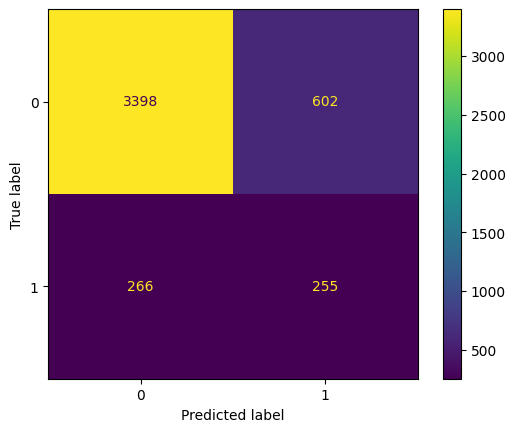

In [60]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_grid_pred, labels=knn_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_grid.classes_)
disp.plot()
plt.show()

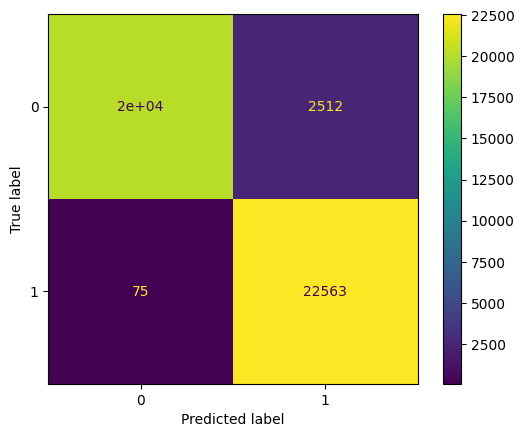

In [59]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_grid_pred, labels=knn_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_grid.classes_)
disp.plot()
plt.show()

##### Phase 1 Learning Curve

param value: 10; train: 0.9965761214618564; test: 0.7517466410748561
param value: 10; train: 0.9965761214618564; test: 0.7517466410748561
param value: 11; train: 0.9960332651182513; test: 0.7516605086372361
param value: 12; train: 0.9955084524392767; test: 0.756575575815739
param value: 13; train: 0.9949760492060238; test: 0.7631432341650672
param value: 14; train: 0.9944590105034617; test: 0.7638430902111324
param value: 15; train: 0.9939167112558068; test: 0.7674712092130517
param value: 16; train: 0.9933839489834828; test: 0.76995273512476
param value: 17; train: 0.9927932516592816; test: 0.771538387715931
param value: 18; train: 0.9922047290581506; test: 0.7714954414587333
param value: 19; train: 0.9915817709026167; test: 0.7718706813819578
param value: 20; train: 0.9909210346169783; test: 0.773253838771593
param value: 20; train: 0.9909210346169783; test: 0.773253838771593
param value: 21; train: 0.9903593716507167; test: 0.7737480806142034
param value: 22; train: 0.98975235463481

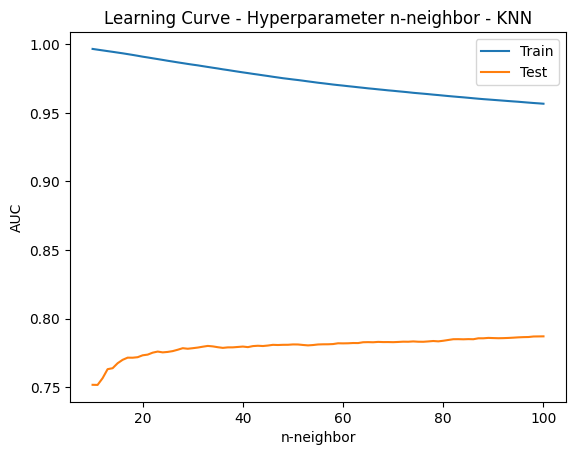

In [96]:
param_values = [int(x) for x in np.linspace(10, 100, 100)]
draw_learning_curve_knn(param_values)

##### Phase 2 Learning Curve

param value: 250; train: 0.9344241517902925; test: 0.790700575815739
param value: 252; train: 0.9342576844956806; test: 0.790716650671785
param value: 254; train: 0.9341265815739386; test: 0.79059452975048
param value: 256; train: 0.9339719479339335; test: 0.7906597888675625
param value: 258; train: 0.933806870940073; test: 0.7905571017274472
param value: 260; train: 0.9336303446975678; test: 0.7906636276391554
param value: 262; train: 0.9334554809620665; test: 0.7908759596928981
param value: 264; train: 0.9332737193835383; test: 0.7907188099808062
param value: 266; train: 0.9330971365533534; test: 0.790829414587332
param value: 268; train: 0.9329428863436611; test: 0.7908809980806142
param value: 270; train: 0.9327629424004311; test: 0.7909572936660269
param value: 272; train: 0.9325918583316746; test: 0.7909004318618043
param value: 274; train: 0.9324262837564925; test: 0.7909460172744722
param value: 276; train: 0.9322667367448492; test: 0.790874520153551
param value: 278; train: 0.

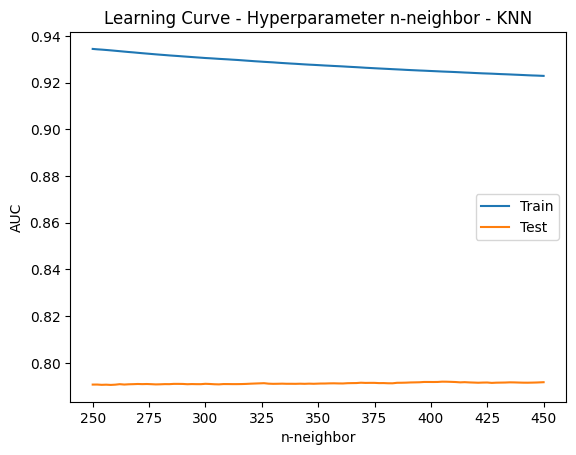

In [97]:
param_values = [int(x) for x in np.linspace(250, 450, 100)]
draw_learning_curve_knn(param_values)

##### Phase 3 Learning Curve

param value: 450; train: 0.9228788133627568; test: 0.7917188099808061
param value: 455; train: 0.9226985279421493; test: 0.7915131957773511
param value: 461; train: 0.9225037668076823; test: 0.7915343090211133
param value: 466; train: 0.9223486180246623; test: 0.7914896833013435
param value: 472; train: 0.922150094785144; test: 0.7915393474088291
param value: 477; train: 0.9219569444482496; test: 0.791328934740883
param value: 483; train: 0.9217757409413213; test: 0.7910904510556622
param value: 488; train: 0.9215888933011669; test: 0.7910578214971209
param value: 494; train: 0.9213881875333815; test: 0.7910938099808061
param value: 500; train: 0.9211973329001137; test: 0.7911429942418426
param value: 505; train: 0.9210311553734479; test: 0.7911933781190019
param value: 511; train: 0.920842297895014; test: 0.7911070057581575
param value: 516; train: 0.9206678702749064; test: 0.791065499040307
param value: 522; train: 0.9204630638516411; test: 0.7911365163147792
param value: 527; train:

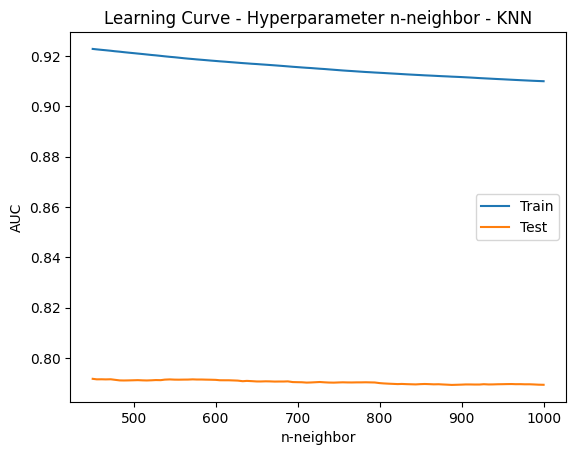

In [98]:
param_values = [int(x) for x in np.linspace(450, 1000, 100)]
draw_learning_curve_knn(param_values)

#### Phase 4 Learning Curve

param value: 1000; train: 0.9100404562103421; test: 0.7893442898272552
param value: 1052; train: 0.90930863994509; test: 0.7888435700575817
param value: 1105; train: 0.9085839800700222; test: 0.7885592610364685
param value: 1157; train: 0.9079095124912073; test: 0.7884839251439539
param value: 1210; train: 0.9072193379286744; test: 0.7882440019193859
param value: 1263; train: 0.9065687503506973; test: 0.7883802783109405
param value: 1315; train: 0.9060165063061583; test: 0.7881413147792706
param value: 1368; train: 0.9054512958777686; test: 0.7879563339731286
param value: 1421; train: 0.9049530589196151; test: 0.7877809500959694
param value: 1473; train: 0.9044701913704007; test: 0.7875338291746642
param value: 1526; train: 0.90396589465227; test: 0.7874107485604607
param value: 1578; train: 0.9035183026918072; test: 0.7870803742802303
param value: 1631; train: 0.9030549695998886; test: 0.7867567178502879
param value: 1684; train: 0.902623232921891; test: 0.7865220729366602
param value

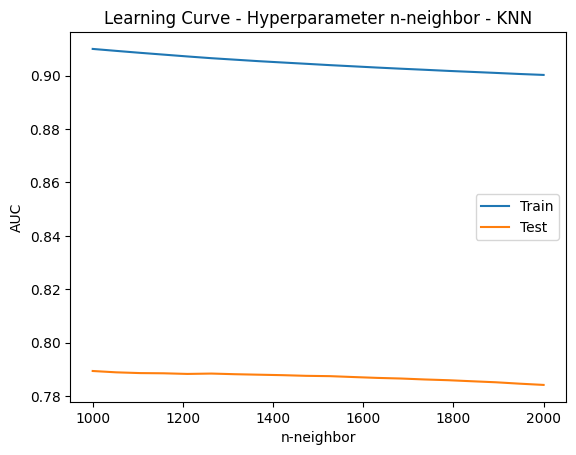

In [99]:
param_values = [int(x) for x in np.linspace(1000, 2000, 20)]
draw_learning_curve_knn(param_values)

#### Phase 5 Learning Curve

param value: 2000; train: 0.9002958948307748; test: 0.7841247600767755
param value: 2078; train: 0.8997699172261179; test: 0.7834952015355086
param value: 2157; train: 0.8992655073326277; test: 0.7830107965451055
param value: 2236; train: 0.8987762551321025; test: 0.7826096449136275
param value: 2315; train: 0.8982606867335633; test: 0.7821960172744722
param value: 2394; train: 0.8977620292704105; test: 0.7817991842610365
param value: 2473; train: 0.897307285798012; test: 0.781392754318618
param value: 2552; train: 0.8968298604225463; test: 0.7811890595009597
param value: 2631; train: 0.8963661156064755; test: 0.7809097888675623
param value: 2710; train: 0.8959303826675106; test: 0.7806425143953936
param value: 2789; train: 0.8955149608029631; test: 0.7804892034548943
param value: 2868; train: 0.8950985788991598; test: 0.7800654990403071
param value: 2947; train: 0.8947054691664621; test: 0.7797648752399232
param value: 3026; train: 0.8942918024956354; test: 0.779343330134357
param val

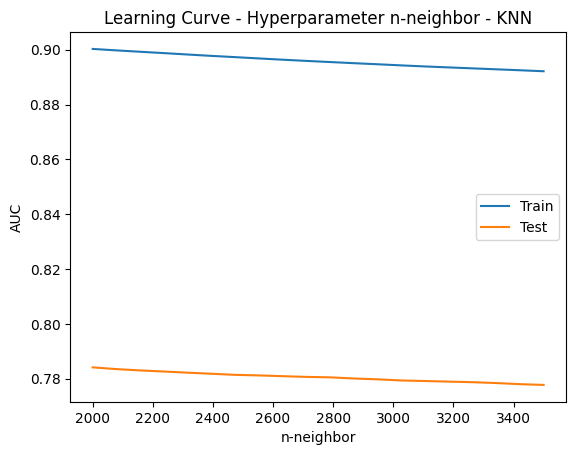

In [100]:
param_values = [int(x) for x in np.linspace(2000, 3500, 20)]
draw_learning_curve_knn(param_values)

#### Best Result Implementation From Learning Curve

In [62]:
start_time = time.time()

knn_best = KNeighborsClassifier(n_neighbors=3500, metric='manhattan')
knn_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.03403306007385254 ms


In [63]:
ytrain_knn_best_pred = knn_best.predict(X_train)
ytest_knn_best_pred  = knn_best.predict(X_test)

In [64]:
accuracy_knn_best_train = accuracy_score(y_train, ytrain_knn_best_pred)
accuracy_knn_best_test  = accuracy_score(y_test, ytest_knn_best_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_best_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_best_test)

Accuracy  (Train Set)    : 0.80
Accuracy  (Test Set)     : 0.69


In [65]:
precision_knn_best_train = precision_score(y_train, ytrain_knn_best_pred)
precision_knn_best_test  = precision_score(y_test, ytest_knn_best_pred)
print("Precision  (Train Set)    : %.2f" % precision_knn_best_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_best_test)

Precision  (Train Set)    : 0.74
Precision  (Test Set)     : 0.23


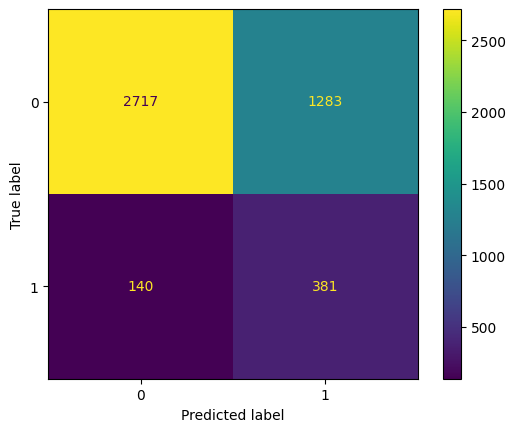

In [66]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_best_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.show()

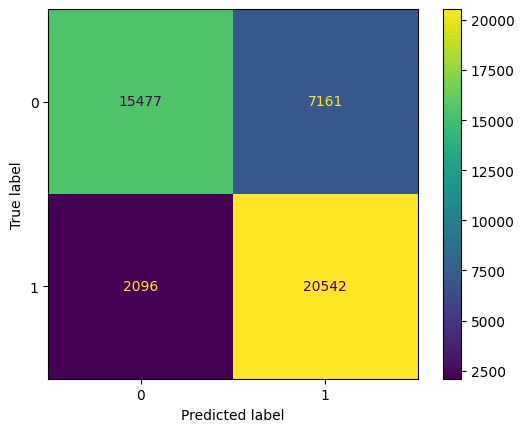

In [67]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_best_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.show()